In [1]:
import nltk
import pandas as pd
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud
import matplotlib.colors as mcolors

nltk downloads should be put here!

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
  

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Load Data

In [3]:
import pandas as pd
df = pd.read_csv('processed_final_Elizabeth.csv')

In [4]:
df.head()

,id_str,created_at,full_text
0,1200485829111513088,2019-11-29 18:45:00,these dem sens. r running against #trump in #2...
1,1200121584142487552,2019-11-28 18:37:37,". is granddaughter, lavinia, gives great pep t..."
2,1200406059933949952,2019-11-29 13:28:01,democrats doing the “attack the leftist polici...
3,1200546342134697984,2019-11-29 22:45:27,@satchelmose i can not understand her point. ...
4,1200546331946889218,2019-11-29 22:45:25,“you did not build that” remix. i hated it w...


In [5]:
df.shape

(18278, 3)

# Data-specific Preprocessing

In [6]:
stop_words = nltk.corpus.stopwords.words('english')


In [7]:
stop_words.extend(['from', 'subject', 're', 'use',"get",'like','want','way','must','yet','take','look','still','hey', 'lol', 'day', 'liz',
                  'thanks', 'part', 'plan', 'lol', 'since', 'ever'])

In [8]:
# tokenize the tweets

def tokenize(text):
    '''names = ["berniesanders", "bernie", "sanders", "bern",
             "elizabethwarren","elizabeth","warren", 'ewarren'
             "joebiden","joe","biden",
             'donaldtrump', 'donald', 'trump',
             'aoc', 'cortez'
            ]'''
    lowered = nltk.tokenize.word_tokenize(text.lower())
    tokenized = [t for t in lowered if t not in stop_words if len(t)>1 if str.isalpha(t)] #if t not in names
    return tokenized

# Tokenization

In [9]:
data = df['full_text']

tokenized_data = []
for text in data:
    tokenized_data.append(tokenize(text))


# PoS Tagging

In [10]:
tagged_data = [nltk.pos_tag(t) for t in tokenized_data]

In [11]:
tagged_data[:5]

[[('dem', 'NN'),
  ('sens', 'NNS'),
  ('running', 'VBG'),
  ('trump', 'NN'),
  ('kamalaharris', 'FW'),
  ('michaelbennet', 'NN'),
  ('amyklobuchar', 'NN'),
  ('corybooker', 'NN'),
  ('berniesanders', 'NNS'),
  ('sens', 'VBP'),
  ('recuse', 'NN'),
  ('sitting', 'VBG'),
  ('juror', 'NN'),
  ('senate', 'NN'),
  ('impeachment', 'NN'),
  ('trial', 'NN')],
 [('granddaughter', 'NN'),
  ('lavinia', 'NN'),
  ('gives', 'VBZ'),
  ('great', 'JJ'),
  ('pep', 'JJ'),
  ('talks', 'NNS'),
  ('hope', 'VBP'),
  ('thanksgiving', 'VBG'),
  ('filled', 'VBN'),
  ('friends', 'NNS'),
  ('family', 'NN'),
  ('chosen', 'VBN'),
  ('family', 'NN'),
  ('loved', 'VBN'),
  ('ones', 'NNS'),
  ('inspire', 'VBP'),
  ('keep', 'VB'),
  ('fighting', 'NN')],
 [('democrats', 'NNS'),
  ('attack', 'VBP'),
  ('leftist', 'JJ'),
  ('policies', 'NNS'),
  ('thing', 'NN'),
  ('aware', 'JJ'),
  ('providing', 'VBG'),
  ('bipartisan', 'JJ'),
  ('legitimacy', 'NN'),
  ('talking', 'VBG'),
  ('points', 'NNS'),
  ('long', 'JJ'),
  ('history

# Lemmatization/Stemming

In [12]:
#from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet

def get_wordnet_pos(word, tag):
    """Map POS tag to first character lemmatize() accepts"""
    tag = tag[0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

#temmer = PorterStemmer()
#def get_stemmed_tokens(tokens):
#    token = []
#    for token_list in tokens:
#        texts = [p_stemmer.stem(i) for i in token_list if ]
#        token.append(texts)
#    return token

lemmatizer = WordNetLemmatizer()

tagnames = ['NN','NNS', 'NNP', 'NNPS', 'JJ', 'VB', 'VBG', 'VBN', 'VBP', 'VBZ']
lemmatized_data = []

for tagged_doc in tagged_data:
    temp = []
    for t1, t2 in tagged_doc:
        if t2 in tagnames:
            temp.append(lemmatizer.lemmatize(t1, get_wordnet_pos(word=t1, tag=t2)))
    lemmatized_data.append(temp)

lemmatized_data[:5]

[['dem',
  'sen',
  'run',
  'trump',
  'michaelbennet',
  'amyklobuchar',
  'corybooker',
  'berniesanders',
  'sens',
  'recuse',
  'sit',
  'juror',
  'senate',
  'impeachment',
  'trial'],
 ['granddaughter',
  'lavinia',
  'give',
  'great',
  'pep',
  'talk',
  'hope',
  'thanksgiving',
  'fill',
  'friend',
  'family',
  'choose',
  'family',
  'love',
  'one',
  'inspire',
  'keep',
  'fighting'],
 ['democrat',
  'attack',
  'leftist',
  'policy',
  'thing',
  'aware',
  'provide',
  'bipartisan',
  'legitimacy',
  'talk',
  'point',
  'long',
  'history',
  'realdonaldtrump',
  'attack',
  'nominee',
  'joebiden',
  'petebuttigieg'],
 ['satchelmose',
  'understand',
  'point',
  'claim',
  'rich',
  'subsidize',
  'top',
  'pay',
  'federal',
  'income',
  'tax',
  'bottom',
  'pay',
  'say'],
 ['build',
  'remix',
  'hat',
  'obama',
  'sound',
  'pander',
  'fraud',
  'fauxcahontas']]

In [13]:
# --------------------

In [14]:
import gensim
def ngrams(stemmed_tokens):
# Build the bigram and trigram models
    bigram = gensim.models.Phrases(stemmed_tokens, min_count=5, threshold=100) # higher threshold fewer phrases.
    trigram = gensim.models.Phrases(bigram[stemmed_tokens], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    trigram_mod = gensim.models.phrases.Phraser(trigram)

    final_tokens = []
# See trigram example
    for i in range(0,len(trigram_mod[bigram_mod[stemmed_tokens]])):
        final_tokens.append(trigram_mod[bigram_mod[stemmed_tokens[i]]])
    return final_tokens

In [15]:
#from nltk import FreqDist

#fdist=FreqDist(final_tokens)

In [16]:
#---------------------------#

# Corpus Generation / Indexing

In [17]:
import gensim
from gensim import corpora


dictionary = corpora.Dictionary(lemmatized_data)
print(len(dictionary))

# filter for terms which occur in no less than 0.1% of the documents (here tweets) and no more than 0.9% of the documents (tweets)
dictionary.filter_extremes(no_below=int(df.shape[0]*0.001), no_above=0.9)

print(len(dictionary))



13965
1457


In [18]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in lemmatized_data]


# LDA-Topic Model

In [19]:
topics_to_discover = 3

In [20]:

# Creating the object for LDA model using gensim library
Lda = gensim.models.ldamodel.LdaModel

# Running and Trainign LDA model on the document term matrix.
ldamodel_elizabeth_warren = Lda(doc_term_matrix, num_topics=topics_to_discover, id2word = dictionary, passes=50, random_state = 42)


In [21]:
print(ldamodel_elizabeth_warren.print_topics(num_topics=topics_to_discover, num_words=5))

[(0, '0.016*"president" + 0.015*"see" + 0.013*"american" + 0.013*"go" + 0.013*"people"'), (1, '0.022*"berniesanders" + 0.021*"tax" + 0.017*"pay" + 0.014*"people" + 0.013*"need"'), (2, '0.020*"law" + 0.018*"good" + 0.018*"school" + 0.016*"go" + 0.015*"job"')]


# Visualizations

In [22]:
import pyLDAvis
import pyLDAvis.gensim
vis = pyLDAvis.gensim.prepare(topic_model=ldamodel_elizabeth_warren, corpus=doc_term_matrix, dictionary=dictionary)
pyLDAvis.enable_notebook()
pyLDAvis.display(vis)

/usr/local/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


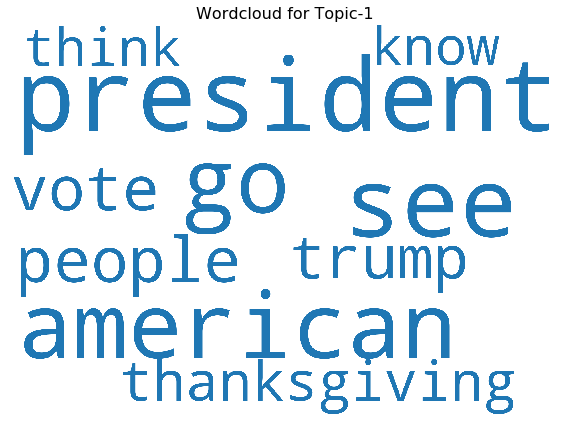

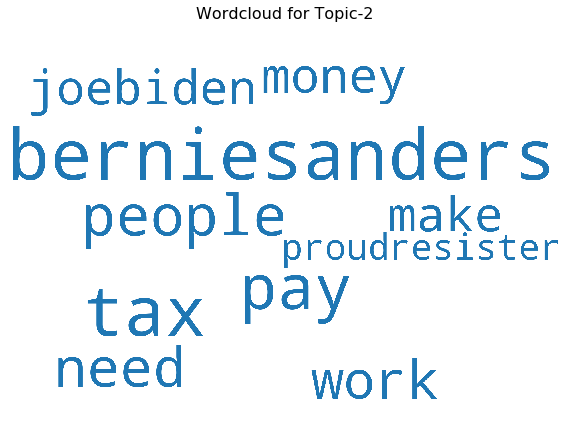

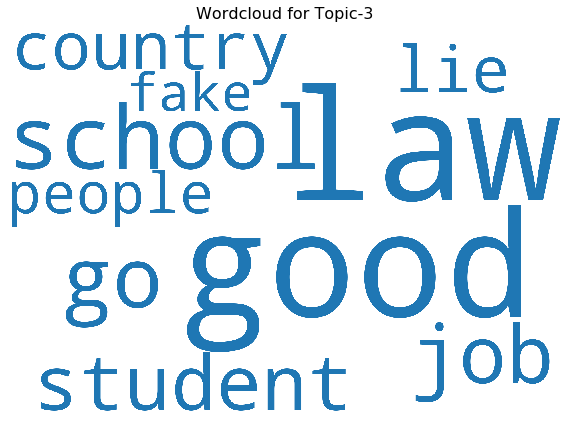

In [23]:
topics = ldamodel_elizabeth_warren.show_topics(formatted=False)
    
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[0],
                  prefer_horizontal=1.0)

for topic_num in range(topics_to_discover):
    fig, axes = plt.subplots(1, 1, figsize=(8,8), sharex=True, sharey=True)

    topic_words = dict(topics[topic_num][1])
    cloud.generate_from_frequencies(topic_words)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Wordcloud for Topic-{}'.format(topic_num+1), fontdict=dict(size=16))
    plt.gca().axis('off')


    plt.subplots_adjust(wspace=0, hspace=0)
    plt.axis('off')
    plt.margins(x=0, y=0)
    plt.tight_layout()
    plt.show()